# Pitch Utils and Zones

This notebook validates:
- Pitch plotting functions from `src.pitch_plot`
- Zone assignment from `src.feature_engineering.add_zone_columns`

Once `pitch_plot.py` is implemented, we can test drawing pitches and overlaying events.


In [2]:
%load_ext autoreload
%autoreload 2

import sys
from pathlib import Path

# Add project root to path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import project modules
from src.data_loader import load_raw_events
from src.feature_engineering import add_zone_columns
from src.pitch_plot import draw_pitch, add_zones_to_ax, plot_events_scatter

# Set plotting style
plt.style.use("seaborn-v0_8")


## Draw Empty Pitch


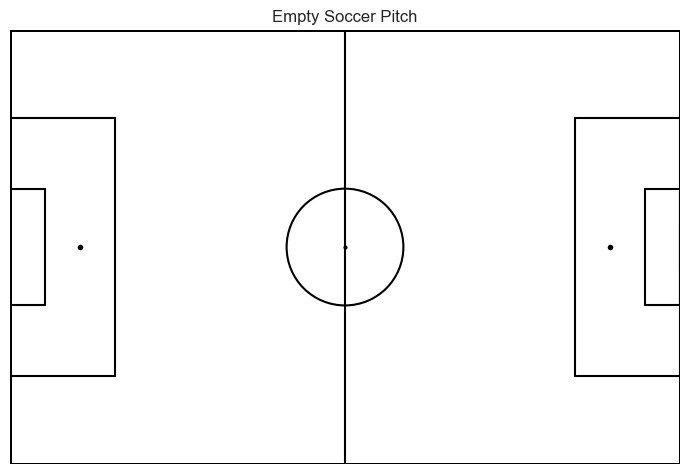

In [3]:
# Draw an empty pitch
# TODO: Run this again after pitch_plot.py is implemented
try:
    fig, ax = plt.subplots(figsize=(7, 10))
    ax = draw_pitch(ax=ax, show=False)
    ax.set_title("Empty Soccer Pitch")
    plt.tight_layout()
    plt.show()
except ImportError:
    print("TODO: Implement pitch_plot.py first")
except Exception as e:
    print(f"Error: {e}")


## Test Zone Assignment


In [4]:
# Load a sample of events
events = load_raw_events()
sample = events.sample(n=min(1000, len(events)), random_state=42)

# Add zone columns
# TODO: Adjust x_col and y_col if dataset uses different column names
events_with_zones = add_zone_columns(
    sample,
    x_col="start_x",  # TODO: Adapt to actual column name
    y_col="start_y",  # TODO: Adapt to actual column name
)

print("Sample events with zones:")
print(events_with_zones[["start_x", "start_y", "zone_x", "zone_y", "zone"]].head(10))


Sample events with zones:
          start_x    start_y zone_x zone_y  zone
544800  42.497280  21.639912     DM      L  DM-L
41258   77.622825  64.664056     AM      R  AM-R
570361  52.012485  46.337240     DM      R  DM-R
356551  15.751155  20.410948      D      L   D-L
270317  71.460585  41.896432     AM      C  AM-C
528781  53.630325   3.073260     AM      L  AM-L
84999   65.744070  10.762768     AM      L  AM-L
20415   32.674950  16.349580     DM      L  DM-L
2636    38.733240  33.681284     DM      C  DM-C
14358   50.268645  35.789624     DM      C  DM-C


In [5]:
# Check zone distribution
print("Zone Distribution:")
print(events_with_zones["zone"].value_counts().head(20))


Zone Distribution:
zone
DM-R       133
DM-L       115
AM-R       108
DM-C       104
AM-L       102
AM-C        92
A-C         67
D-R         55
D-C         55
A-L         52
A-R         48
D-L         47
AM-nan       5
DM-nan       4
A-nan        3
D-nan        3
nan-C        3
nan-nan      2
nan-L        2
Name: count, dtype: int64


## Plot Sample Points with Zones


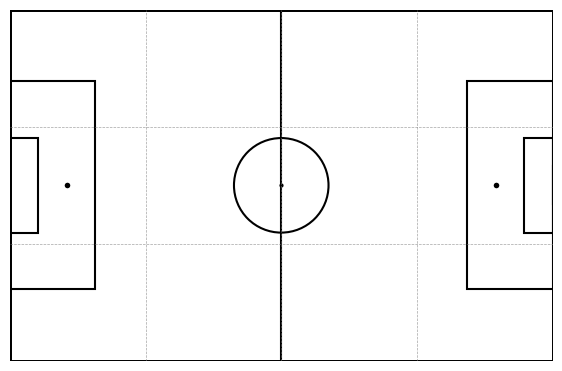

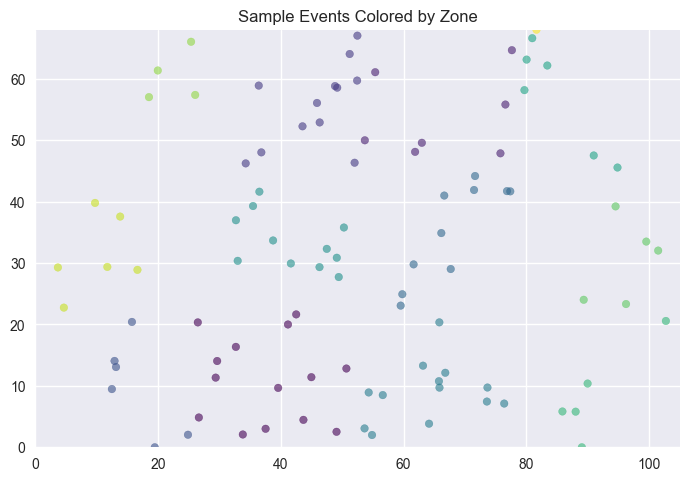

In [6]:
# Plot sample events colored by zone
# TODO: Run this again after pitch_plot.py is implemented
try:
    fig, ax = plt.subplots(figsize=(7, 10))
    ax = draw_pitch(ax=ax, show=False)
    ax = add_zones_to_ax(ax)
    
    # Plot events colored by zone
    ax = plot_events_scatter(
        events_with_zones.head(100),
        ax=ax,
        x_col="start_x",
        y_col="start_y",
        color_col="zone",
        alpha=0.6,
        size=30,
        draw_pitch_flag=False,
    )
    
    ax.set_title("Sample Events Colored by Zone")
    plt.tight_layout()
    plt.show()
except ImportError:
    print("TODO: Implement pitch_plot.py first")
except Exception as e:
    print(f"Error: {e}")


"Sample Events Colored by Zone" 시각화의 의미를 확인 중입니다.


[1 tool called]


## "Sample Events Colored by Zone" 시각화 설명

이 시각화는 샘플 이벤트를 피치 위에 표시하고, 각 이벤트의 Zone에 따라 색상을 다르게 표시합니다.

### 목적
- Zone 할당이 올바른지 확인
- Zone별 이벤트 분포를 시각적으로 확인
- 피치 그리기와 Zone 격자 표시가 정상인지 검증

### 시각화 구성 요소

1. 축구장 배경 (`draw_pitch`)
   - 필드 라인, 페널티 박스, 중앙선 등

2. Zone 격자선 (`add_zones_to_ax`)
   - 점선으로 Zone 경계 표시
   - X축: D, DM, AM, A (4개 구역)
   - Y축: L, C, R (3개 구역)

3. 이벤트 점들 (`plot_events_scatter`)
   - 샘플 100개 이벤트의 위치 표시
   - Zone별로 색상 구분
   - 예: DM-L은 한 색, AM-C는 다른 색

### 예상 결과

- 각 점은 이벤트 위치 (start_x, start_y)
- 색상은 Zone에 따라 다름
- Zone 격자선과 점의 Zone이 일치하는지 확인 가능

### 활용

- Zone 할당 검증: 점이 해당 Zone 경계 내에 있는지 확인
- 분포 확인: 어떤 Zone에 이벤트가 많은지 파악
- 데이터 품질 확인: 이상치나 잘못된 좌표 탐지

### 예시 해석

- DM-C(중앙 수비 미드필드) 점이 많다 → 중앙 지역에서 많은 이벤트 발생
- A-R(우측 공격 지역) 점이 적다 → 우측 공격 지역 이벤트가 적음
- Zone 경계 근처 점들이 올바른 Zone에 할당되었는지 확인

이 시각화는 Zone 시스템이 올바르게 작동하는지 검증하는 데 사용됩니다.